In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
#Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Information on features 
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))
data.head()

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
data.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27734400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,8908,1959,Graduation,Married,87195.0,0,0,2014-08-05,35,217,76,690,50,26,38,1,3,11,5,1,0,0,0,0,0,0,3,11,1,10627200000000000
105,8373,1979,Basic,Together,24594.0,1,0,2013-10-12,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,3,11,0,36288000000000000
106,7533,1964,Graduation,Married,49096.0,1,1,2013-09-24,15,144,1,32,2,1,7,4,4,1,4,7,0,0,0,0,0,0,3,11,0,37843200000000000
107,2683,1969,Graduation,Married,52413.0,0,2,2013-02-02,56,295,106,271,75,98,65,4,6,4,12,6,0,0,0,0,0,0,3,11,0,58060800000000000


In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,40,422,Partner,1,3,1


In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

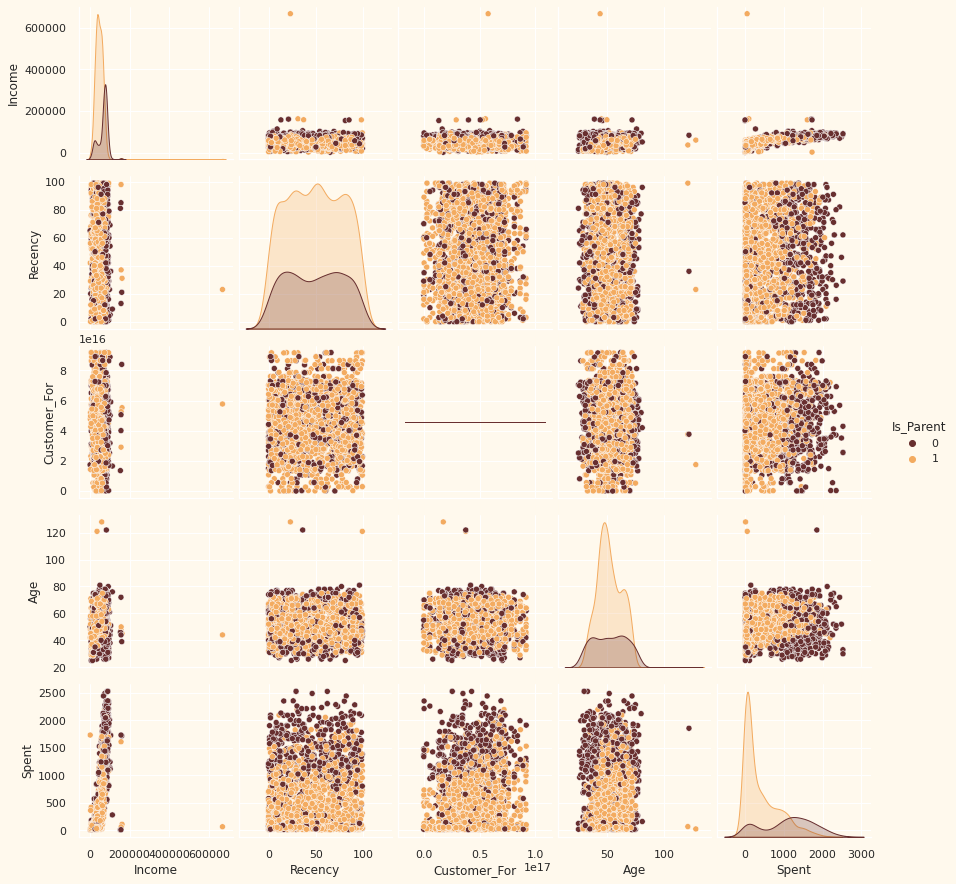

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure

#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.figure(figsize=(20, 20))
plt.show()

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [ ]:
data.head(100)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Graduate,87195.0,0,0,35,217,76,690,50,26,38,1,3,11,5,1,0,0,0,0,0,0,1,10627200000000000,62,1097,Partner,0,2,0
105,Undergraduate,24594.0,1,0,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0,36288000000000000,42,29,Partner,1,3,1
106,Graduate,49096.0,1,1,15,144,1,32,2,1,7,4,4,1,4,7,0,0,0,0,0,0,0,37843200000000000,57,187,Partner,2,4,1
107,Graduate,52413.0,0,2,56,295,106,271,75,98,65,4,6,4,12,6,0,0,0,0,0,0,0,58060800000000000,52,910,Partner,2,4,1


In [ ]:
data.drop(["Kidhome", "Teenhome", "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
         "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2",
         "Complain", "Response", "Customer_For", "Is_Parent"], axis=1, inplace= True, errors='ignore')
data

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spent,Living_With,Children,Family_Size
0,Graduate,58138.0,635,88,546,172,88,88,64,1617,Alone,0,1
1,Graduate,46344.0,11,1,6,2,1,6,67,27,Alone,2,3
2,Graduate,71613.0,426,49,127,111,21,42,56,776,Partner,0,2
3,Graduate,26646.0,11,4,20,10,3,5,37,53,Partner,1,3
4,Postgraduate,58293.0,173,43,118,46,27,15,40,422,Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,709,43,182,42,118,247,54,1341,Partner,1,3
2236,Postgraduate,64014.0,406,0,30,0,0,8,75,444,Partner,3,5
2237,Graduate,56981.0,908,48,217,32,12,24,40,1241,Alone,0,1
2238,Postgraduate,69245.0,428,30,214,80,30,61,65,843,Partner,1,3


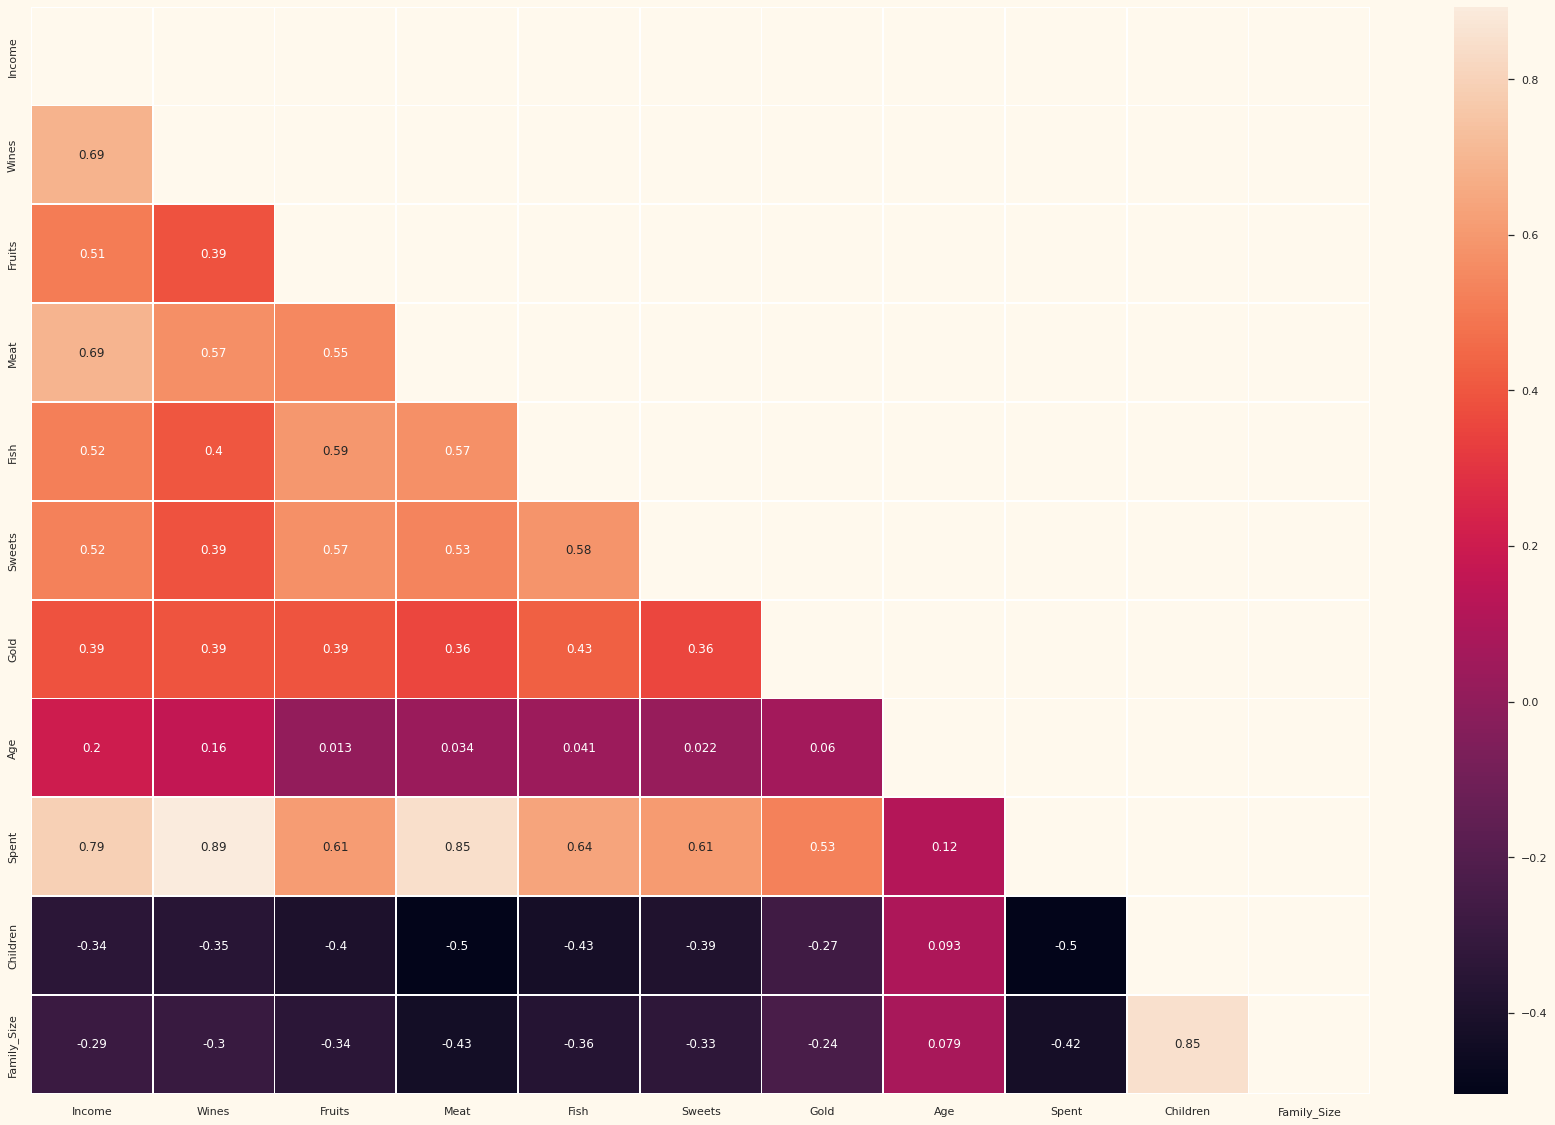

In [ ]:
plt.figure(figsize=(30, 20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Education    2212 non-null   object 
 1   Income       2212 non-null   float64
 2   Wines        2212 non-null   int64  
 3   Fruits       2212 non-null   int64  
 4   Meat         2212 non-null   int64  
 5   Fish         2212 non-null   int64  
 6   Sweets       2212 non-null   int64  
 7   Gold         2212 non-null   int64  
 8   Age          2212 non-null   int64  
 9   Spent        2212 non-null   int64  
 10  Living_With  2212 non-null   object 
 11  Children     2212 non-null   int64  
 12  Family_Size  2212 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 241.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

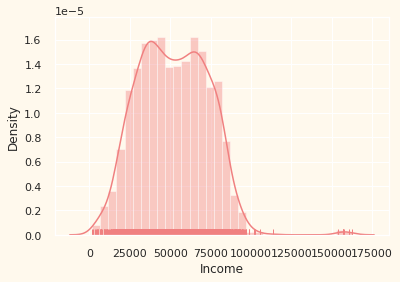

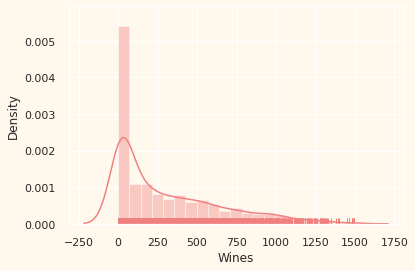

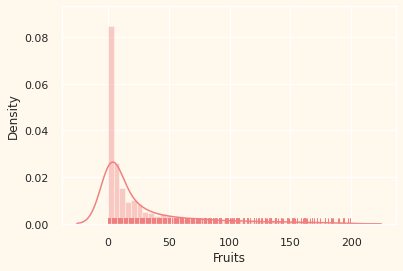

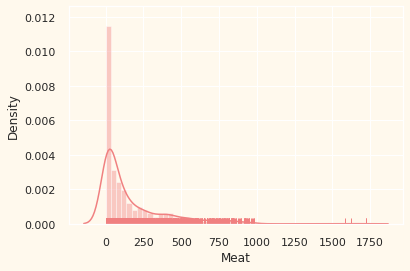

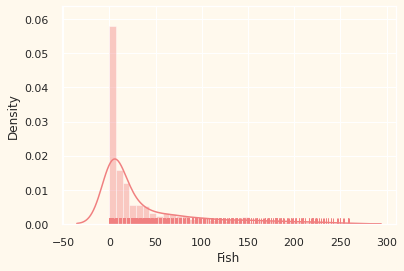

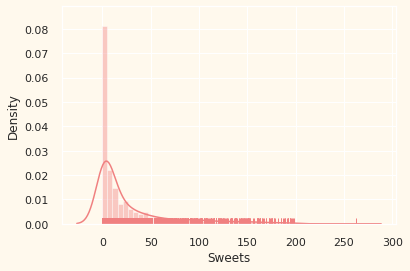

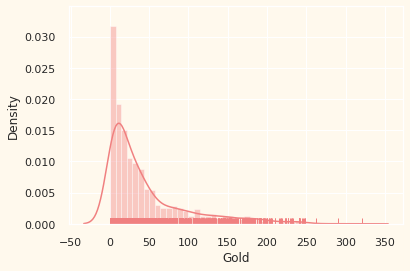

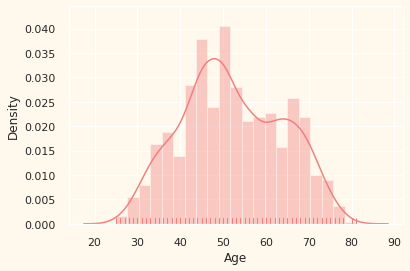

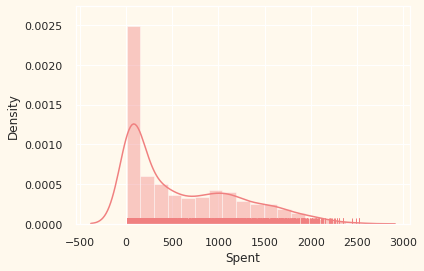

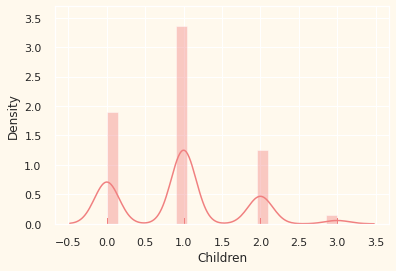

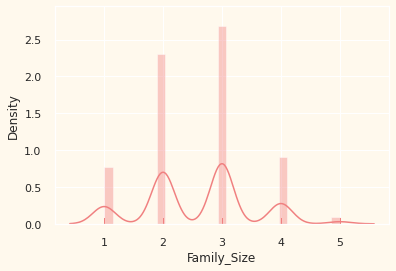

In [ ]:
def distributionPlot(columnName):
    if ((columnName != 'Education') and (columnName != 'Living_With')):
        plt.figure()
        sns.distplot(data[columnName], color="lightcoral", rug=True);

for column in data.columns:
    distributionPlot(column)

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Living_With"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Partner    1428
Alone       784
Name: Living_With, dtype: int64 

Total categories in the feature Education:
 Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64


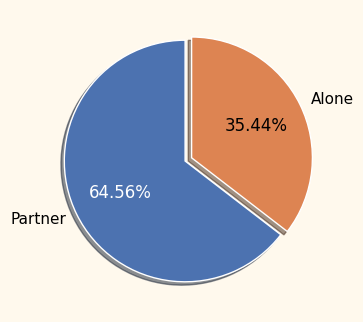

In [ ]:
values = data['Living_With'].value_counts()
labels = ['Partner', 'Alone']

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.show()

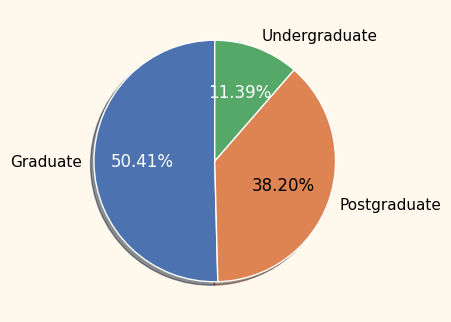

In [ ]:
values = data['Education'].value_counts()
labels = ['Graduate', 'Postgraduate', 'Undergraduate']

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=None)

plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.show()

In [ ]:
data.head(20)

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spent,Living_With,Children,Family_Size
0,Graduate,58138.0,635,88,546,172,88,88,64,1617,Alone,0,1
1,Graduate,46344.0,11,1,6,2,1,6,67,27,Alone,2,3
2,Graduate,71613.0,426,49,127,111,21,42,56,776,Partner,0,2
3,Graduate,26646.0,11,4,20,10,3,5,37,53,Partner,1,3
4,Postgraduate,58293.0,173,43,118,46,27,15,40,422,Partner,1,3
5,Postgraduate,62513.0,520,42,98,0,42,14,54,716,Partner,1,3
6,Graduate,55635.0,235,65,164,50,49,27,50,590,Alone,1,2
7,Postgraduate,33454.0,76,10,56,3,1,23,36,169,Partner,1,3
8,Postgraduate,30351.0,14,0,24,3,3,2,47,46,Partner,1,3
9,Postgraduate,5648.0,28,0,6,1,1,13,71,49,Partner,2,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Education    2212 non-null   object 
 1   Income       2212 non-null   float64
 2   Wines        2212 non-null   int64  
 3   Fruits       2212 non-null   int64  
 4   Meat         2212 non-null   int64  
 5   Fish         2212 non-null   int64  
 6   Sweets       2212 non-null   int64  
 7   Gold         2212 non-null   int64  
 8   Age          2212 non-null   int64  
 9   Spent        2212 non-null   int64  
 10  Living_With  2212 non-null   object 
 11  Children     2212 non-null   int64  
 12  Family_Size  2212 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 241.9+ KB


In [ ]:
data.drop(["Education", "Living_With"], axis=1, inplace= True, errors='ignore')
data

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spent,Children,Family_Size
0,58138.0,635,88,546,172,88,88,64,1617,0,1
1,46344.0,11,1,6,2,1,6,67,27,2,3
2,71613.0,426,49,127,111,21,42,56,776,0,2
3,26646.0,11,4,20,10,3,5,37,53,1,3
4,58293.0,173,43,118,46,27,15,40,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,54,1341,1,3
2236,64014.0,406,0,30,0,0,8,75,444,3,5
2237,56981.0,908,48,217,32,12,24,40,1241,0,1
2238,69245.0,428,30,214,80,30,61,65,843,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       2212 non-null   float64
 1   Wines        2212 non-null   int64  
 2   Fruits       2212 non-null   int64  
 3   Meat         2212 non-null   int64  
 4   Fish         2212 non-null   int64  
 5   Sweets       2212 non-null   int64  
 6   Gold         2212 non-null   int64  
 7   Age          2212 non-null   int64  
 8   Spent        2212 non-null   int64  
 9   Children     2212 non-null   int64  
 10  Family_Size  2212 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 207.4 KB


In [ ]:
from sklearn.cluster import KMeans
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#c8a2c8"]
def elbowOptimizer(data):
    try:
        print('Elbow Method to determine the number of clusters to be formed:')
        model = KMeans(init='k-means++', random_state=1005)
        Elbow_M = KElbowVisualizer(model, k=10)
        Elbow_M.fit(data)
        Elbow_M.show()
    except AttributeError:
        print("-------------------")

def kmeansTrainer(numberOfClusters, data):
    """
    Trains KMeans Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    kmeans = KMeans(n_clusters=numberOfClusters, init='k-means++', random_state=1005)
    labels = kmeans.fit_predict(data)
    return (kmeans, labels)

def dendoOptimizer(data):
    """Plots a Dendogram Plot on the data provided"""
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

def heirarchicalTrainer(noOfClusters, data):
    """
    Trains Agglomerative Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    hc = AgglomerativeClustering(n_clusters=noOfClusters, affinity='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc, hc_labels)

def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel, model_type):
    plt.figure(figsize=(25,10))
    """Plots Scatter Plot for the clusters on the Data given"""
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1 ], s=20, c=color[i], label ='Cluster '+str(i+1))
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
                    :, 1], s=100, c='#7E370C', label='Centroids')   
    plt.title('Clusters of customers using '+model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def plotting(clusters):
    #Plotting countplot of clusters
    pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#c8a2c8"]
    pl = sns.countplot(x=data[clusters], palette= pal)
    pl.set_title("Distribution Of The" +clusters)
    plt.show()

def AdvancePlot(clusters, col):
    plt.figure(figsize=(20,7.5))
    pl=sns.swarmplot(x=data[clusters], y=data[col], color= "#CBEDDD", size=2.5)
    pl=sns.boxenplot(x=data[clusters], y=data[col], palette=pal, width=0.65)
    pl.set_title(clusters + col)
    plt.show()

In [ ]:
x1 = data.iloc[:, [8, 0]].values

Elbow Method to determine the number of clusters to be formed:


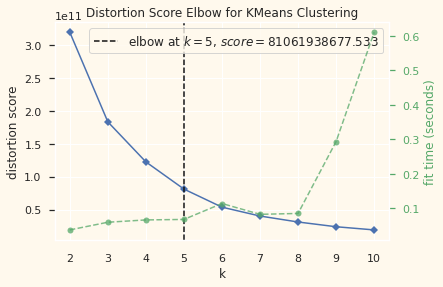

In [ ]:
elbowOptimizer(x1)

In [ ]:
clust_no = 4

kmeans, labels = kmeansTrainer(clust_no, x1)
data["ClustersKM"] = labels

# AggS = AgglomerativeClustering(n_clusters=clust_no, linkage='single')
# labels_AggS = AggS.fit_predict(x1)
# data["ClustersAGS"]= labels_AggS

# AggC = AgglomerativeClustering(n_clusters=clust_no, linkage='complete')
# labels_AggC = AggC.fit_predict(x1)
# data["ClustersAGC"]= labels_AggC

# AggW = AgglomerativeClustering(n_clusters=clust_no)
# labels_AggW = AggW.fit_predict(x1)

hc, hc_labels = heirarchicalTrainer(clust_no, x1)
data["ClustersAGW"]= hc_labels

In [ ]:
data

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spent,Children,Family_Size,ClustersKM,ClustersAGW
0,58138.0,635,88,546,172,88,88,64,1617,0,1,1,0
1,46344.0,11,1,6,2,1,6,67,27,2,3,0,0
2,71613.0,426,49,127,111,21,42,56,776,0,2,1,2
3,26646.0,11,4,20,10,3,5,37,53,1,3,2,1
4,58293.0,173,43,118,46,27,15,40,422,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,54,1341,1,3,1,0
2236,64014.0,406,0,30,0,0,8,75,444,3,5,1,0
2237,56981.0,908,48,217,32,12,24,40,1241,0,1,1,0
2238,69245.0,428,30,214,80,30,61,65,843,1,3,1,2


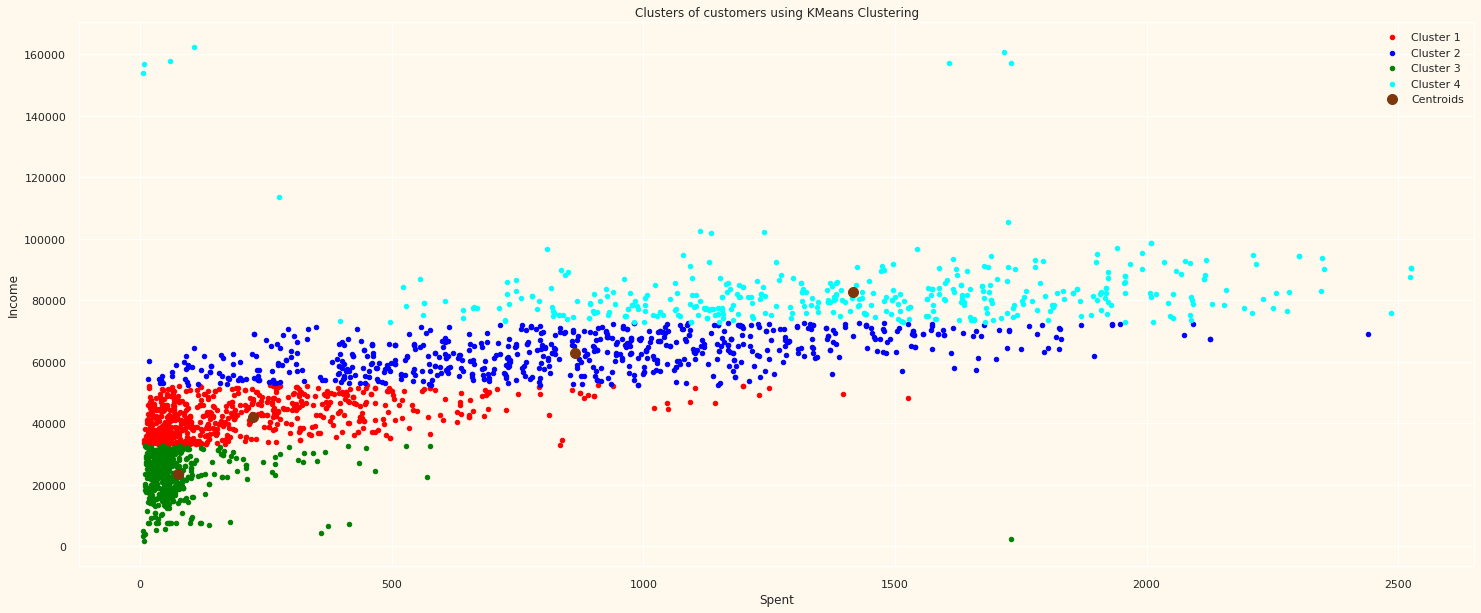

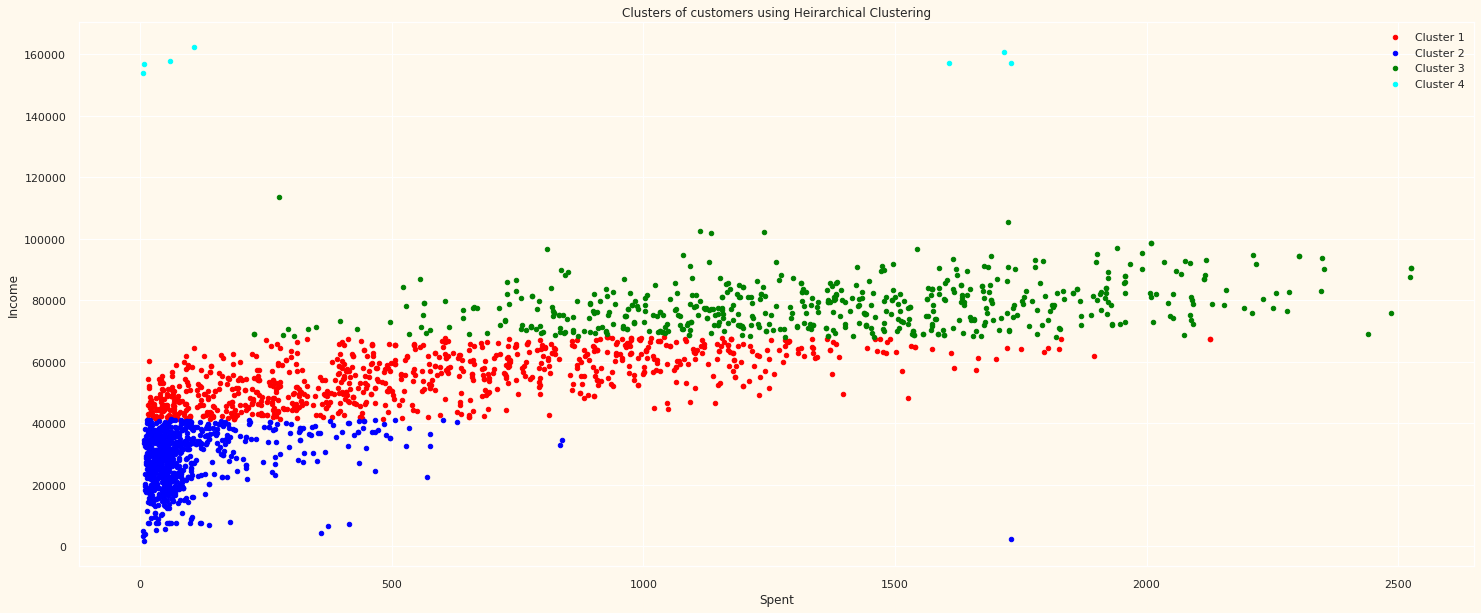

In [ ]:
clusterVisualiser(x1, kmeans, clust_no, labels,
                  'Spent', 'Income', 'KMeans Clustering')

clusterVisualiser(x1, hc, clust_no, hc_labels,
                  'Spent', 'Income', 'Heirarchical Clustering')

In [ ]:
print("Total categories in the feature ClustersAGW:\n", data["ClustersAGW"].value_counts())
print("Total categories in the feature ClustersKM:\n", data["ClustersKM"].value_counts())

Total categories in the feature ClustersAGW:
 0    877
1    772
2    556
3      7
Name: ClustersAGW, dtype: int64
Total categories in the feature ClustersKM:
 0    676
1    671
2    460
3    405
Name: ClustersKM, dtype: int64


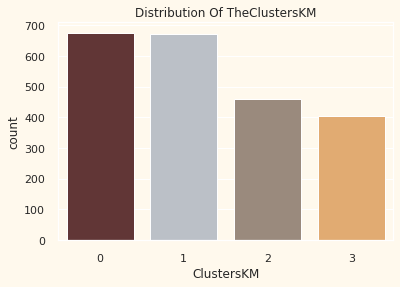

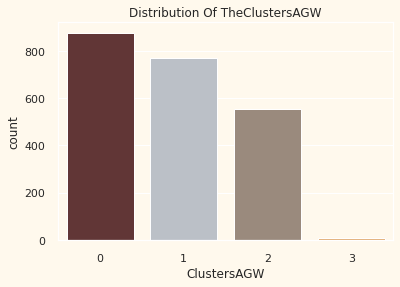

In [ ]:
plotting('ClustersKM')
# plotting('ClustersAGS')
# plotting('ClustersAGC')
plotting('ClustersAGW')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


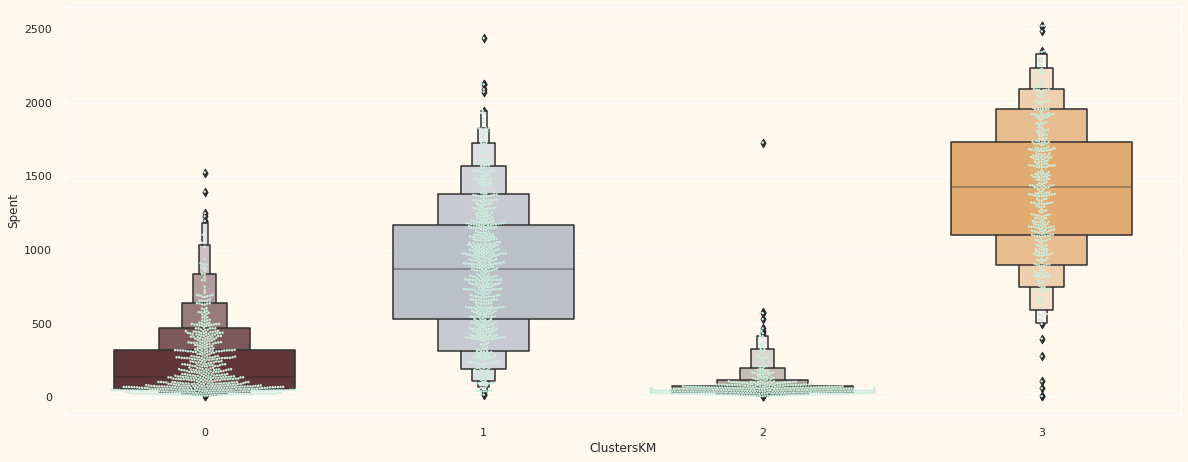

-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


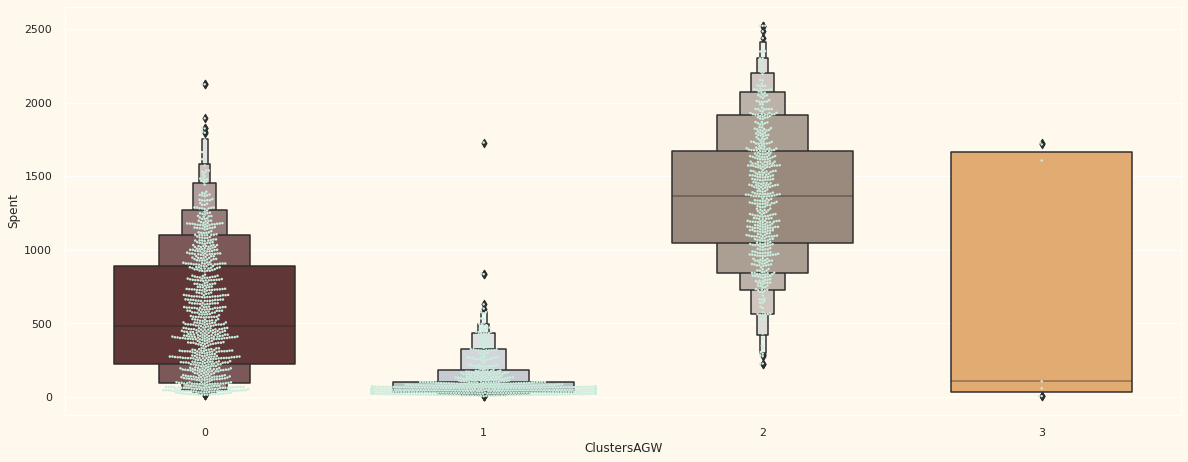

In [ ]:
AdvancePlot('ClustersKM', 'Spent')
print("-----------------------------------------------------")
AdvancePlot('ClustersAGW', 'Spent')

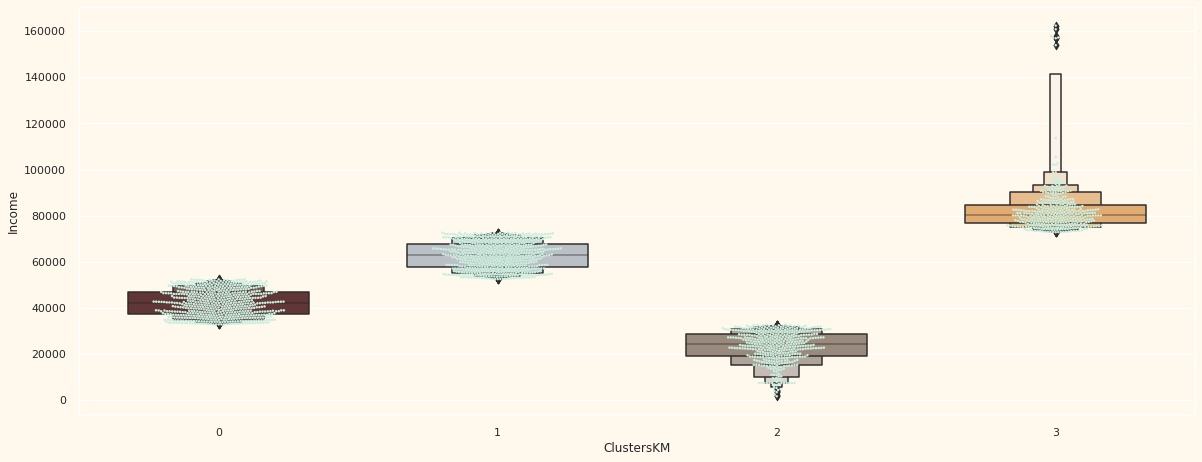

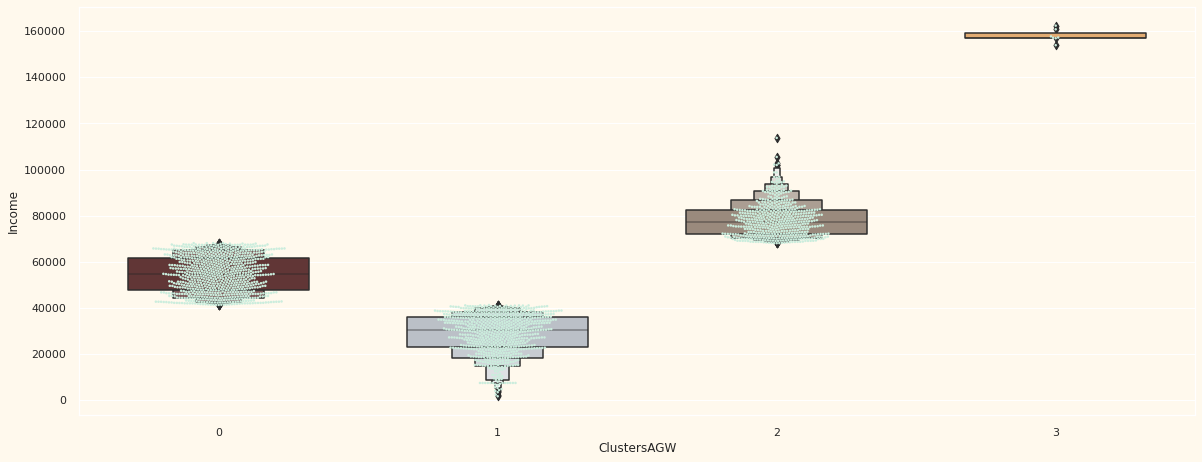

In [ ]:
AdvancePlot('ClustersKM', 'Income')
AdvancePlot('ClustersAGW', 'Income')

Borderline

In [ ]:
x2 = data.iloc[:, [0,7,8]]

Elbow Method to determine the number of clusters to be formed:


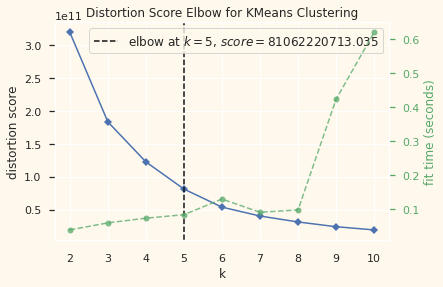

In [ ]:
elbowOptimizer(x2)

In [ ]:
kmeans, labels = kmeansTrainer(5, x2)
x2['label'] = labels

hc, hc_labels = heirarchicalTrainer(5, x2)
x2['hc_labels'] = hc_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x2

,Income,Age,Spent,label,hc_labels
0,58138.0,64,1617,4,1
1,46344.0,67,27,0,4
2,71613.0,56,776,1,2
3,26646.0,37,53,2,0
4,58293.0,40,422,4,1
...,...,...,...,...,...
2235,61223.0,54,1341,4,1
2236,64014.0,75,444,4,1
2237,56981.0,40,1241,4,1
2238,69245.0,65,843,4,2


In [ ]:
import plotly.express as px

In [ ]:
print("Total categories in the feature hc_labels:\n", x2['hc_labels'].value_counts())
print("Total categories in the feature label:\n", x2['label'].value_counts())

Total categories in the feature hc_labels:
 0    772
2    556
1    482
4    395
3      7
Name: hc_labels, dtype: int64
Total categories in the feature label:
 0    647
4    617
1    493
2    448
3      7
Name: label, dtype: int64


In [ ]:
fig = px.scatter_3d(x2, x="Income", y="Age", z="Spent",
                    color='label', size='label', size_max=15)
fig.show()

In [ ]:
fig = px.scatter_3d(x2, x="Income", y="Age", z="Spent",
                    color='hc_labels', size='hc_labels', size_max=15)
fig.show()

In [ ]:
data.drop(["ClustersAGS", 'ClustersAGC'], axis=1, inplace= True, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income       2212 non-null   float64
 1   Wines        2212 non-null   int64  
 2   Fruits       2212 non-null   int64  
 3   Meat         2212 non-null   int64  
 4   Fish         2212 non-null   int64  
 5   Sweets       2212 non-null   int64  
 6   Gold         2212 non-null   int64  
 7   Age          2212 non-null   int64  
 8   Spent        2212 non-null   int64  
 9   Children     2212 non-null   int64  
 10  Family_Size  2212 non-null   int64  
 11  ClustersKM   2212 non-null   int32  
 12  ClustersAGW  2212 non-null   int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 313.3 KB


In [ ]:
x3 = data.iloc[:, [8, 0]].values
x3df = data.iloc[:, [8, 0]]

Elbow Method to determine the number of clusters to be formed:


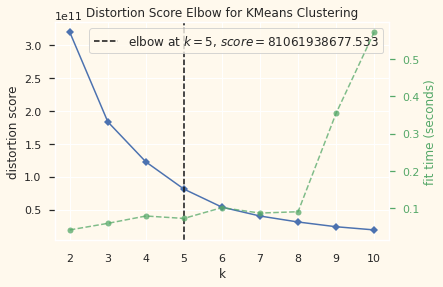

In [ ]:
elbowOptimizer(x3)

In [ ]:
clust_no = 5

kmeans, labels = kmeansTrainer(clust_no, x3)
x3df["ClustersKM"] = labels

hc, hc_labels = heirarchicalTrainer(clust_no, x3)
x3df["ClustersAGW"]= hc_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x3df

,Spent,Income,ClustersKM,ClustersAGW
0,1617,58138.0,4,1
1,27,46344.0,0,4
2,776,71613.0,1,2
3,53,26646.0,2,0
4,422,58293.0,4,1
...,...,...,...,...
2235,1341,61223.0,4,1
2236,444,64014.0,4,1
2237,1241,56981.0,4,1
2238,843,69245.0,4,2


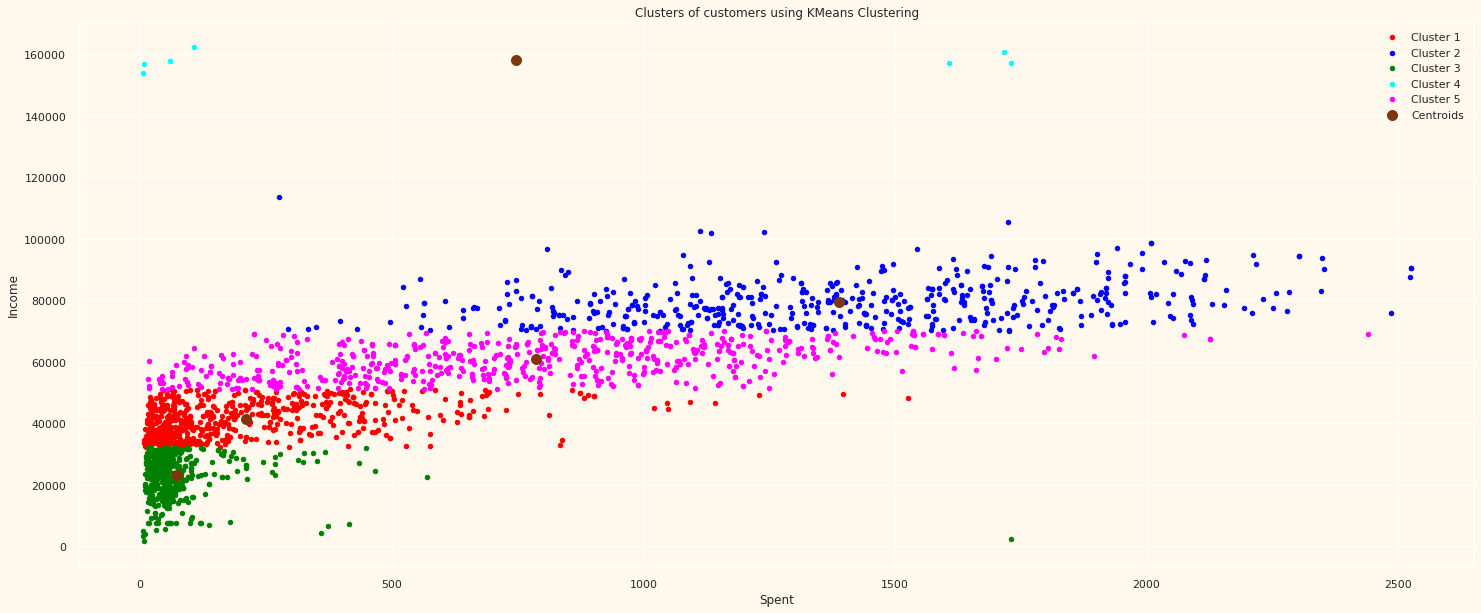

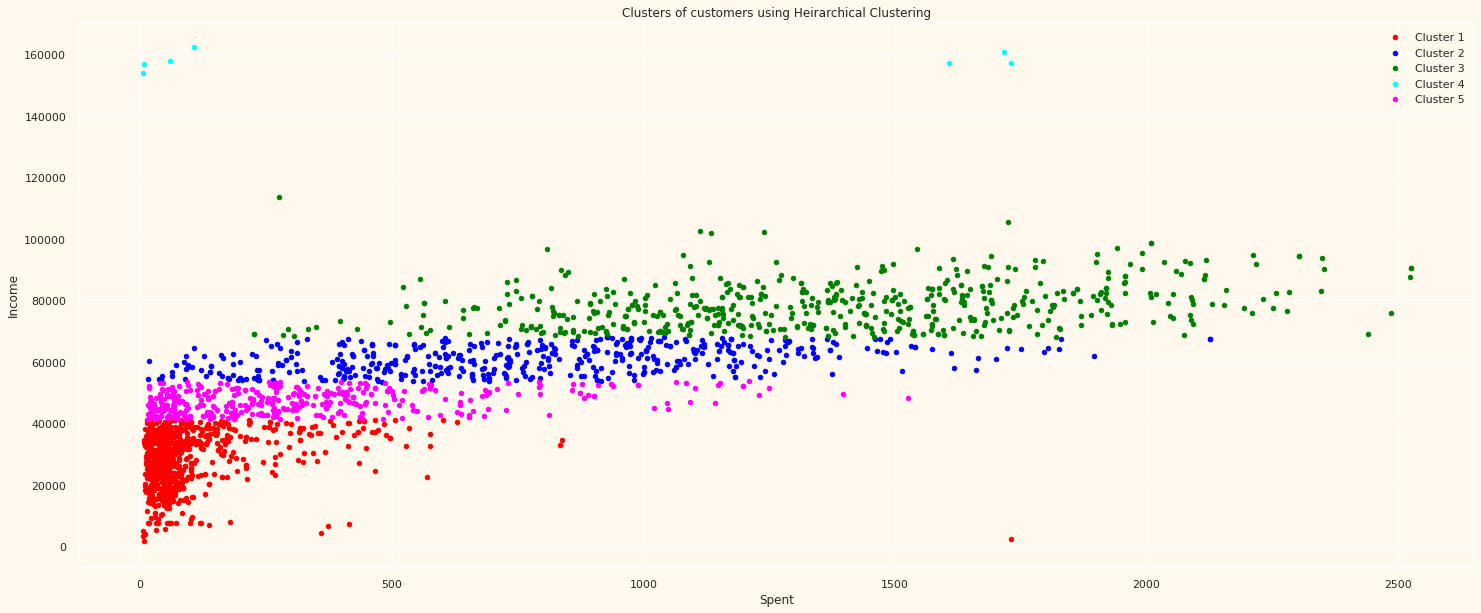

In [ ]:
clusterVisualiser(x3, kmeans, clust_no, labels,
                  'Spent', 'Income', 'KMeans Clustering')

clusterVisualiser(x3, hc, clust_no, hc_labels,
                  'Spent', 'Income', 'Heirarchical Clustering')

In [ ]:
print("Total categories in the feature ClustersAGW:\n", x3df["ClustersAGW"].value_counts())
print("-----------------------------------------------------")
print("Total categories in the feature ClustersKM:\n", x3df["ClustersKM"].value_counts())

Total categories in the feature ClustersAGW:
 0    772
2    556
1    482
4    395
3      7
Name: ClustersAGW, dtype: int64
-----------------------------------------------------
Total categories in the feature ClustersKM:
 0    647
4    617
1    493
2    448
3      7
Name: ClustersKM, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



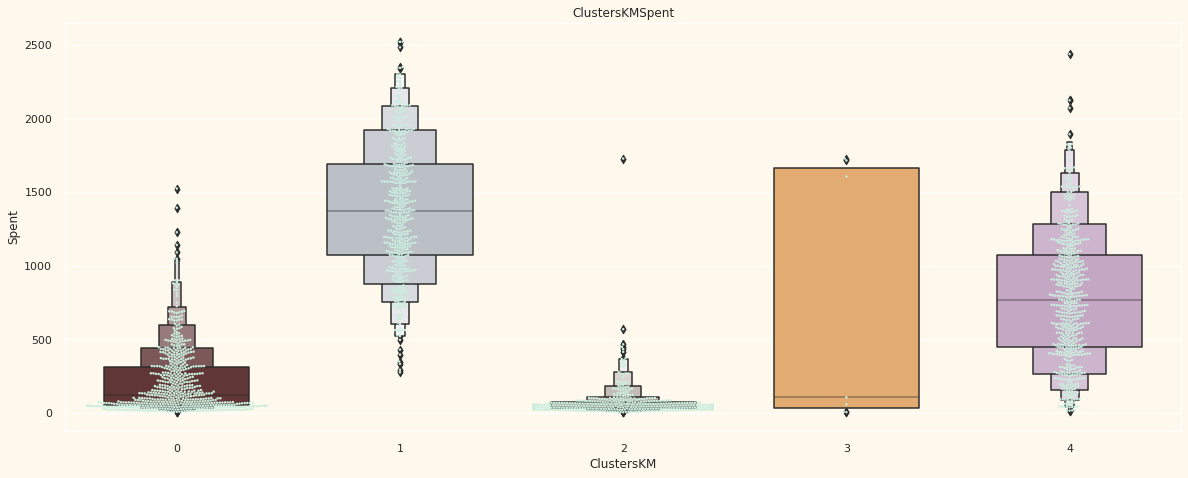

-----------------------------------------------------


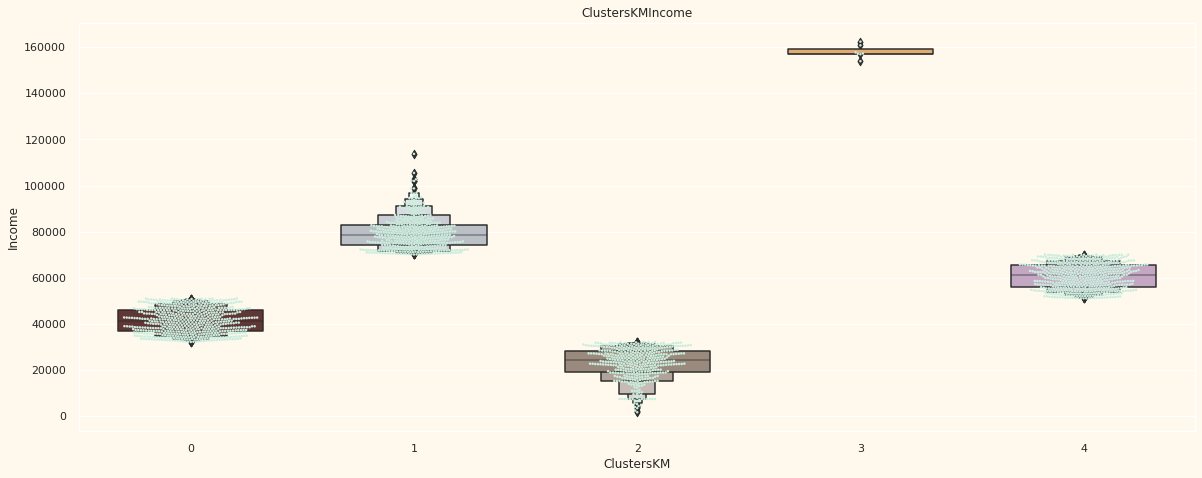

-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



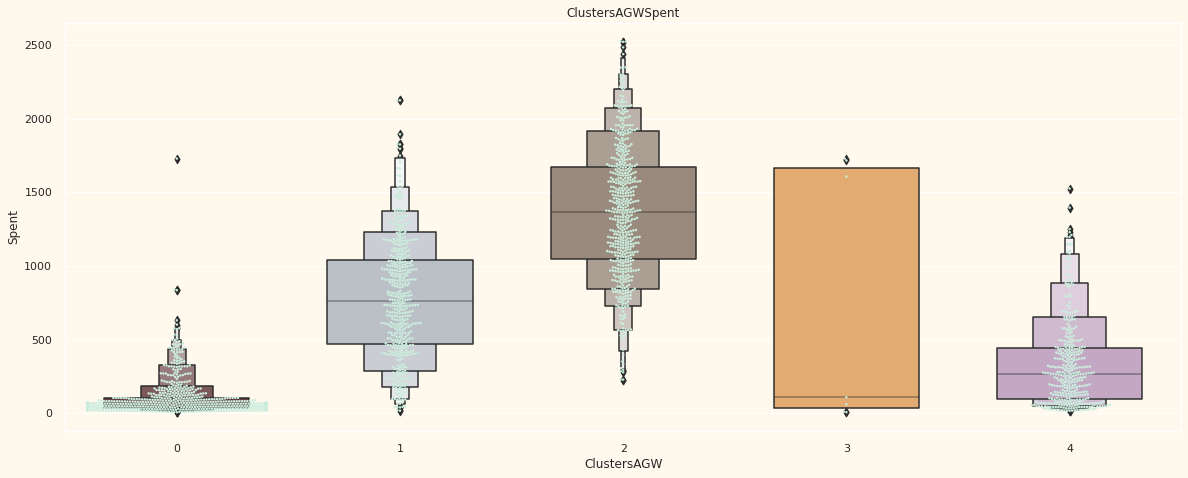

-----------------------------------------------------


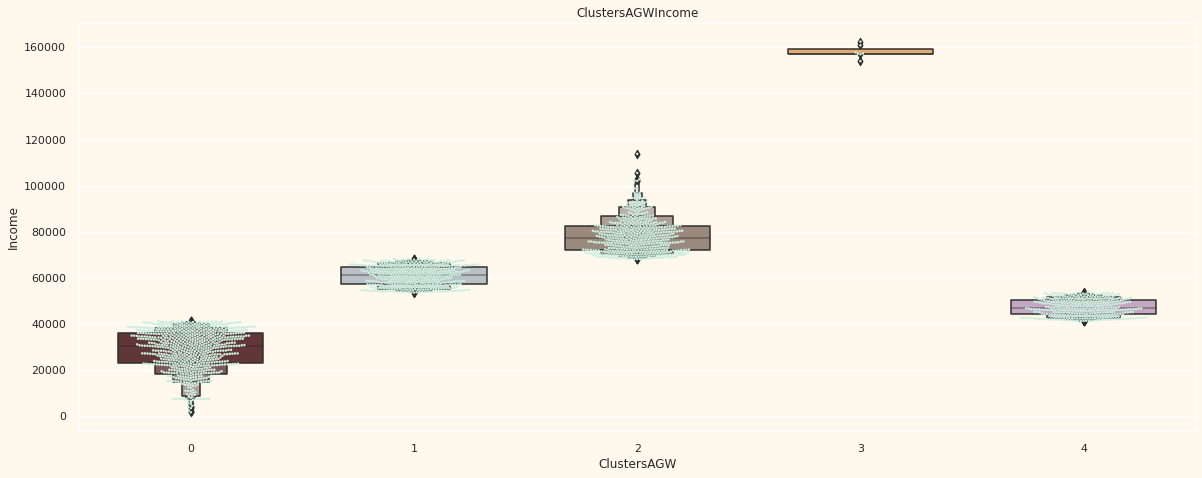

-----------------------------------------------------


In [ ]:
AdvancePlot('ClustersKM', 'Spent')
print("-----------------------------------------------------")
AdvancePlot('ClustersKM', 'Income')
print("-----------------------------------------------------")
AdvancePlot('ClustersAGW', 'Spent')
print("-----------------------------------------------------")
AdvancePlot('ClustersAGW', 'Income')
print("-----------------------------------------------------")

In [ ]:
from sklearn.model_selection import train_test_split

usefull_columns = data.columns.difference(['ClustersKM','ClustersAGW'])
X = data[usefull_columns]
Y = data["ClustersKM"].astype(int)
X

,Age,Children,Family_Size,Fish,Fruits,Gold,Income,Meat,Spent,Sweets,Wines
0,64,0,1,172,88,88,58138.0,546,1617,88,635
1,67,2,3,2,1,6,46344.0,6,27,1,11
2,56,0,2,111,49,42,71613.0,127,776,21,426
3,37,1,3,10,4,5,26646.0,20,53,3,11
4,40,1,3,46,43,15,58293.0,118,422,27,173
...,...,...,...,...,...,...,...,...,...,...,...
2235,54,1,3,42,43,247,61223.0,182,1341,118,709
2236,75,3,5,0,0,8,64014.0,30,444,0,406
2237,40,0,1,32,48,24,56981.0,217,1241,12,908
2238,65,1,3,80,30,61,69245.0,214,843,30,428


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=1000)

In [ ]:
#Importing the needed packages for SVM algorithm
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#Defining an SVM classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, Y_train)

SVC(kernel='poly')

Recall Score : 0.9132007233273056
Precision Score : 0.9132007233273056
F1 Score : 0.9132007233273056
-----------------------------------------------
Accuracy Score : 0.9132007233273056


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



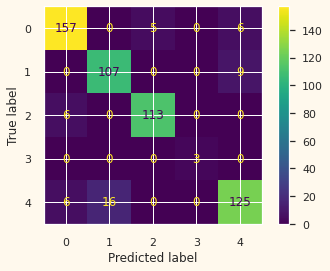

In [ ]:
#Training the model
Y_pred = svclassifier.predict(X_test)

#metrics and accuracy scores
print('Recall Score :',recall_score(Y_test,Y_pred, average='micro'))
print('Precision Score :',precision_score(Y_test,Y_pred, average='micro'))
print('F1 Score :',f1_score(Y_test,Y_pred, average='micro'))
print('-----------------------------------------------')
print('Accuracy Score :',accuracy_score(Y_test,Y_pred))

#Ploting the confusion matrix
plot_confusion_matrix(svclassifier,X_test,Y_test)